In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### POTENTIAL CONTOUR GRAPH

In [3]:
#MODEL

def sig(x):
    return 1/(1 + np.exp(-x))

class Matrix:
    def __init__(self,n,val):
        """
        creates scheme/grid for nxn matrix with the origin at the center
        val = list-style matrix of charges
        """
        self.dim = n
        self.positions = []
        for i in range(n):
            self.positions.append([])
            for j in range(n):
                self.positions[i].append([])
                
        for i in range(n):
            for j in range(n):
                self.positions[i][j]= (i,j)
        
        self.values = val
    
    def potential(self,x,y):

        def check(x_1,y_1):
            # checks if any distance is closer than 1/40 to any charge and in that case does not
            # calculate it. This value can be regulated to change the size of the centers of the charges
            r = 1/40
            for i in range(self.dim):
                for j in range(self.dim):
                    (c_x, c_y)= self.positions[i][j]
                    dist = (x_1-c_x)**2 + (y_1-c_y)**2
                    if dist<r and self.values[i][j]!=0:
                        return True
        
        pot = 0
        for i in range(self.dim):
            for j in range(self.dim):
                (c_x, c_y)= self.positions[i][j]
                dist = (x-c_x)**2 + (y-c_y)**2
                q = self.values[i][j]
                if check(x,y)==True:
                    return 1/2
                else:
                    pot += q/dist
        #pot *= 1/(4 * np.pi *8.8541878176*10**(-12))
        return sig(pot)
        #return pot

    def potential_contour(self):
        """
        returns contour list value
        """
        x=np.linspace(-1, self.dim, 40*self.dim)
        y=np.linspace(-1, self.dim, 40*self.dim)
        X,Y = np.meshgrid(x,y)

        z = []; p = -1
        for i in x:
            z.append([])
            p += 1
            for j in y:
                z[p].append(self.potential(i,j))
        return (X,Y,z)
        

### Examples

In [4]:
def paint(X,Y,z,option=1):
    """
    option=1 -> color PRGn
    option=2 -> color inferno
    option=3 -> color PRGn with manual parameters
    option=4 -> color inferno with manual parameters
    """
    if option==1:
        plt.contourf(X, Y, z, 20, cmap='PRGn')
    elif option==2:
        plt.contourf(X, Y, z, 20, cmap='inferno')
    elif option==3:
        levels = [-2.5,-1.5,-0.5,0,0.5,1,2,2.5]
        levels = list(range(-25,-17,)) + list(range(-17,-9,2))+ list(range(-9,-5,1))+ np.arange(-5,0,0.5).tolist() + np.arange(0,5,0.5).tolist()+ list(range(5,9,1))+ list(range(9,17,2))+ list(range(17,26,3))
        levels = [0,0.5,0.10,0.15,0.25,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.75,0.85,0.90,1]
        levels = np.arange(0,1.06,0.07).tolist()
        plt.contourf(X, Y, z, levels, cmap='PRGn')
    elif option==4:
        levels = [-2.5,-1.5,-0.5,0,0.5,1,2,2.5]
        levels = list(range(-25,-17,)) + list(range(-17,-9,2))+ list(range(-9,-5,1))+ np.arange(-5,0,0.5).tolist() + np.arange(0,5,0.5).tolist()+ list(range(5,9,1))+ list(range(9,17,2))+ list(range(17,26,3))
        levels = [0,0.5,0.10,0.15,0.25,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.75,0.85,0.90,1]
        levels = np.arange(0,1.06,0.07).tolist()
        plt.contourf(X, Y, z, levels, cmap='inferno')
    else:
        raise Exception('Non valid option')
    plt.colorbar()


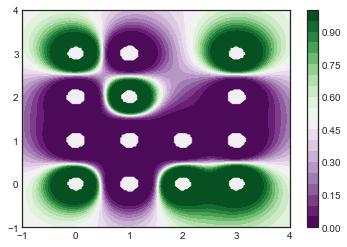

In [5]:
#4-ATOMS EXAMPLES

example1 = [[1,-1,1,1],[-1,-1,-1,-1],[-1,1,0,-1],[1,-1,0,1]]
example2 = [[0,0,-1,1],[1,0,0,-1],[0,0,0,0],[-1,0,1,0]]

four1 = Matrix(4,example1)
X,Y,z = four1.potential_contour()

paint(X,Y,z,1)
